## Importing Libaries and Modules

In [1]:
# Importing Important Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random
from pathlib import Path
from tqdm.notebook import tqdm
import re
import warnings


warnings.filterwarnings('ignore')
import logging
import time

In [2]:
# Configure the logger
logging.basicConfig(level=logging.WARNING)  # Adjust the log level as needed
# Set up a file handler to save logs to a file
log_file = 'logs/data_cleaner.log'
file_handler = logging.FileHandler(log_file)
file_handler.setLevel(logging.INFO)  # Adjust the log level as needed
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)

# Add the file handler to the logger
logger = logging.getLogger(__name__)
logger.addHandler(file_handler)

### Handling Raw Data

In [3]:
raw_data_path = Path("datasets/g20_raw_data.csv")
raw_data = pd.read_csv(raw_data_path)
display(raw_data.head())

,Series Name,Series Code,Country Name,Country Code,1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,Argentina,ARG,..,..,..,34.03839404,32.76262784,30.37099055,...,15.31971022,16.10743905,14.56261556,14.96386557,13.41810079,11.82578069,14.87426431,19.11757389,..,..
1,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,Australia,AUS,..,..,..,..,..,..,...,24.58845708,24.30342107,23.17352013,21.21821891,22.41241032,22.4413726,23.27337379,24.57498917,..,..
2,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,Brazil,BRA,..,..,21.83711367,19.52124571,20.11643795,19.95870114,...,18.40746571,16.44076791,14.80798801,13.71267295,13.83644283,13.07087306,12.88752293,15.33326854,..,..
3,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,Canada,CAN,23.54913717,24.48415402,21.43182218,22.25910036,21.05833391,20.83639622,...,21.93134446,22.51225199,19.87382492,19.38325078,20.10090864,19.83495477,20.27153848,18.90878582,..,..
4,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,China,CHN,..,..,..,..,..,..,...,47.76683415,47.55544345,45.63534427,44.60182309,44.9639649,44.68200336,43.896015,44.85112622,..,..


#### Preliminary EDA on Raw Data

In [4]:
# 1. Summary statistics
summary_stats = raw_data.describe()
display(summary_stats)

,Series Name,Series Code,Country Name,Country Code,1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
count,1502,1500,1500,1500,1500,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
unique,77,75,20,20,716,732,787,813,817,823,...,1285,1295,1183,1281,1292,1263,1221,1168,832,588
top,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,Argentina,ARG,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,20,20,75,75,766,750,695,669,666,663,...,197,191,185,200,194,224,268,321,655,910


In [5]:
# Data types and missing values
data_info = raw_data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    1502 non-null   object
 1   Series Code    1500 non-null   object
 2   Country Name   1500 non-null   object
 3   Country Code   1500 non-null   object
 4   1973 [YR1973]  1500 non-null   object
 5   1974 [YR1974]  1500 non-null   object
 6   1975 [YR1975]  1500 non-null   object
 7   1976 [YR1976]  1500 non-null   object
 8   1977 [YR1977]  1500 non-null   object
 9   1978 [YR1978]  1500 non-null   object
 10  1979 [YR1979]  1500 non-null   object
 11  1980 [YR1980]  1500 non-null   object
 12  1981 [YR1981]  1500 non-null   object
 13  1982 [YR1982]  1500 non-null   object
 14  1983 [YR1983]  1500 non-null   object
 15  1984 [YR1984]  1500 non-null   object
 16  1985 [YR1985]  1500 non-null   object
 17  1986 [YR1986]  1500 non-null   object
 18  1987 [YR1987]  1500 non-null

In [6]:
# Get Countries name
COUNTRIES = raw_data["Country Name"].unique()
COUNTRIES = [country for country in COUNTRIES if pd.notna(country)]
print(COUNTRIES)

['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'United States', 'United Kingdom', 'Mexico', 'Japan', 'Korea, Rep.', 'Russian Federation', 'Saudi Arabia', 'South Africa', 'Turkiye', 'European Union']


In [7]:
# Renaming Year
# Create a mapping dictionary to rename the columns
column_mapping = {}
for column in raw_data.columns:
    if re.match(r'\d{4} \[YR\d{4}\]', column):
        # Extract the year part using regular expression
        year = re.search(r'\d{4}', column).group()
        column_mapping[column] = year

# Rename the columns
raw_data = raw_data.rename(columns=column_mapping)

In [8]:
raw_data.head()

,Series Name,Series Code,Country Name,Country Code,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,Argentina,ARG,..,..,..,34.03839404,32.76262784,30.37099055,...,15.31971022,16.10743905,14.56261556,14.96386557,13.41810079,11.82578069,14.87426431,19.11757389,..,..
1,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,Australia,AUS,..,..,..,..,..,..,...,24.58845708,24.30342107,23.17352013,21.21821891,22.41241032,22.4413726,23.27337379,24.57498917,..,..
2,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,Brazil,BRA,..,..,21.83711367,19.52124571,20.11643795,19.95870114,...,18.40746571,16.44076791,14.80798801,13.71267295,13.83644283,13.07087306,12.88752293,15.33326854,..,..
3,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,Canada,CAN,23.54913717,24.48415402,21.43182218,22.25910036,21.05833391,20.83639622,...,21.93134446,22.51225199,19.87382492,19.38325078,20.10090864,19.83495477,20.27153848,18.90878582,..,..
4,Adjusted savings: gross savings (% of GNI),NY.ADJ.ICTR.GN.ZS,China,CHN,..,..,..,..,..,..,...,47.76683415,47.55544345,45.63534427,44.60182309,44.9639649,44.68200336,43.896015,44.85112622,..,..


In [9]:
# Extract columns for years from raw_data
years_columns = raw_data.columns[4:]
print(years_columns)

Index(['1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')


In [10]:
# Get Availble columns
print(raw_data.columns)

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')


In [11]:
# Types of Data available
data_available = raw_data['Series Name'].unique()
DATA_NAME = data_available
# Convert all elements to strings
data_available = [str(value) for value in data_available]

print(data_available)

['Adjusted savings: gross savings (% of GNI)', 'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)', 'Bank nonperforming loans to total gross loans (%)', 'Claims on other sectors of the domestic economy (% of GDP)', 'Claims on other sectors of the domestic economy (annual growth as % of broad money)', 'Domestic credit provided by financial sector (% of GDP)', 'Domestic credit to private sector (% of GDP)', 'Domestic credit to private sector by banks (% of GDP)', 'Domestic general government health expenditure (% of current health expenditure)', 'Domestic general government health expenditure (% of GDP)', 'Domestic general government health expenditure (% of general government expenditure)', 'Domestic general government health expenditure per capita (current US$)', 'Domestic general government health expenditure per capita, PPP (current international $)', 'Domestic private health expenditure (% of current health expenditure)', 'Domestic private health expenditure

## 2d dataframe

In [12]:
# Create a new DataFrame with 'country' as the first column and unique values from 'Series Name' as columns
df = pd.DataFrame(columns=['Countries'] + data_available)

# Drop the specified columns only if they exist in the DataFrame
columns_to_remove = ['nan', 'Last Updated: 10/26/2023']
columns_to_remove = [col for col in columns_to_remove if col in df.columns]

df = df.drop(columns=columns_to_remove)

# Add G20 Countries
df["Countries"] = COUNTRIES

display(df)

,Countries,Adjusted savings: gross savings (% of GNI),"Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)",Bank nonperforming loans to total gross loans (%),Claims on other sectors of the domestic economy (% of GDP),Claims on other sectors of the domestic economy (annual growth as % of broad money),Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Domestic general government health expenditure (% of current health expenditure),...,"School enrollment, secondary (% gross)","School enrollment, secondary (gross), gender parity index (GPI)","School enrollment, secondary, female (% gross)","School enrollment, secondary, male (% gross)","School enrollment, tertiary (% gross)","School enrollment, tertiary (gross), gender parity index (GPI)","School enrollment, tertiary, female (% gross)","School enrollment, tertiary, male (% gross)","Stocks traded, turnover ratio of domestic shares (%)",Data from database: World Development Indicators
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Define the range of years
YEARS = range(1973, 2023)

# Create a MultiIndex for the index
index = pd.MultiIndex.from_product([COUNTRIES, YEARS], names=['country', 'year'])

# Create an empty DataFrame with the MultiIndex as the index
g20_data = pd.DataFrame(index=index)

# Add Columns with data
for col in data_available:
    g20_data[col] = None

In [14]:
# Assuming you have a DataFrame with a MultiIndex, such as 'g20_data'
# You can access the MultiIndex and its structure like this:

multi_index = g20_data.index

# To get the levels of the MultiIndex
levels = multi_index.levels

# To get the names of the levels
level_names = multi_index.names

# To get the number of levels in the MultiIndex
num_levels = multi_index.nlevels

# Print the information
print("MultiIndex Levels:", levels)
print("MultiIndex Level Names:", level_names)
print("Number of MultiIndex Levels:", num_levels)

MultiIndex Levels: [['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'European Union', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Korea, Rep.', 'Mexico', 'Russian Federation', 'Saudi Arabia', 'South Africa', 'Turkiye', 'United Kingdom', 'United States'], [1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]]
MultiIndex Level Names: ['country', 'year']
Number of MultiIndex Levels: 2


In [15]:
g20_data.head()

Adjusted savings: gross savings (% of GNI)  \
country   year                                              
Argentina 1973                                       None   
          1974                                       None   
          1975                                       None   
          1976                                       None   
          1977                                       None   

               Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)  \
country   year                                                                              
Argentina 1973                                               None                           
          1974                                               None                           
          1975                                               None                           
          1976                                               None                           
          1977                                               None                           

               Bank nonperforming loans to total gross loans (%)  \
country   year                                                     
Argentina 1973                                              None   
          1974                                              None   
          1975                                              None   
          1976                                              None   
          1977                                              None   

               Claims on other sectors of the domestic economy (% of GDP)  \
country   year                                                              
Argentina 1973                                               None           
          1974                                               None           
          1975                                               None           
          1976                                               None           
          1977                                               None           

               Claims on other sectors of the domestic economy (annual growth as % of broad money)  \
country   year                                                                                       
Argentina 1973                                               None                                    
          1974                                               None                                    
          1975                                               None                                    
          1976                                               None                                    
          1977                                               None                                    

               Domestic credit provided by financial sector (% of GDP)  \
country   year                                                           
Argentina 1973                                               None        
          1974                                               None        
          1975                                               None        
          1976                                               None        
          1977                                               None        

               Domestic credit to private sector (% of GDP)  \
country   year                                                
Argentina 1973                                         None   
          1974                                         None   
          1975                                         None   
          1976                                         None   
          1977                                         None   

               Domestic credit to private sector by banks (% of GDP)  \
country   year                                                         
Argentina 1973                                               None      
          1974            

### 3d Dataframe

In [16]:
# Measure the start time
start_time = time.time()

# Create a single tqdm loop for the outermost iteration
progress_bar = tqdm(total=len(COUNTRIES) * len(YEARS) * len(DATA_NAME), bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]", position=0)

# Iterate over countries, years, and data names
for country in COUNTRIES:
    for year in YEARS:
        for index in DATA_NAME:
            try:
                description = f"Modifying {country} on {year}"
                progress_bar.set_description(description)

                # Construct the column name corresponding to the year
                year_column = str(year)

                # Filter the data based on the current country, year, and data name
                filtered_data = raw_data[(raw_data['Series Name'] == index) & (raw_data['Country Name'] == country)][year_column]

                # Check if any data is found for the current combination
                if not filtered_data.empty:
                    # Assuming you want to update the 'g20_data' DataFrame with the filtered data
                    # You need to provide the column in 'g20_data' where you want to store the filtered data
                    # Here, we assume 'index' is the column name in 'g20_data'
                    g20_data.loc[(country, year), index] = filtered_data.values[0]
            except Exception as e:
                logger.error(f"Error for {country} on {year} for {index}: {str(e)}")

            progress_bar.update(1)

# Remove useles columns
columns_to_remove = ['nan','Data from database: World Development Indicators', 'Last Updated: 10/26/2023']
g20_data = g20_data.drop(columns=columns_to_remove)

# Close the tqdm progress bar
progress_bar.close()

# Measure the end time
end_time = time.time()

# Calculate and log the elapsed time
elapsed_time = end_time - start_time
logger.info(f"Total elapsed time to make multidimesional Dataframe: {elapsed_time:.2f} seconds")
print(f"Process Completed in {elapsed_time:.2f} seconds")

  0%|          | 0/78000 [00:00<?]

Process Completed in 118.10 seconds


In [17]:
g20_data.head()

Adjusted savings: gross savings (% of GNI)  \
country   year                                              
Argentina 1973                                         ..   
          1974                                         ..   
          1975                                         ..   
          1976                                34.03839404   
          1977                                32.76262784   

               Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)  \
country   year                                                                              
Argentina 1973                                                 ..                           
          1974                                                 ..                           
          1975                                                 ..                           
          1976                                                 ..                           
          1977                                                 ..                           

               Bank nonperforming loans to total gross loans (%)  \
country   year                                                     
Argentina 1973                                                ..   
          1974                                                ..   
          1975                                                ..   
          1976                                                ..   
          1977                                                ..   

               Claims on other sectors of the domestic economy (% of GDP)  \
country   year                                                              
Argentina 1973                                                 ..           
          1974                                                 ..           
          1975                                                 ..           
          1976                                                 ..           
          1977                                                 ..           

               Claims on other sectors of the domestic economy (annual growth as % of broad money)  \
country   year                                                                                       
Argentina 1973                                                 ..                                    
          1974                                                 ..                                    
          1975                                                 ..                                    
          1976                                                 ..                                    
          1977                                                 ..                                    

               Domestic credit provided by financial sector (% of GDP)  \
country   year                                                           
Argentina 1973                                   27.4901879012225        
          1974                                    30.371312312636        
          1975                                   28.7594771456156        
          1976                                   20.3441509421658        
          1977                                   26.4137652814314        

               Domestic credit to private sector (% of GDP)  \
country   year                                                
Argentina 1973                              16.705575724589   
          1974                             19.1738082781793   
          1975                             16.4413498377265   
          1976                             13.5627672947772   
          1977                             18.3829098551528   

               Domestic credit to private sector by banks (% of GDP)  \
country   year                                                         
Argentina 1973                                   15.6482608053113      
          1974            

In [18]:
g20_data.tail()

Adjusted savings: gross savings (% of GNI)  \
country        year                                              
European Union 2018                           25.2294177448061   
               2019                           25.5716180198675   
               2020                           24.6958165282482   
               2021                                         ..   
               2022                                         ..   

                    Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)  \
country        year                                                                              
European Union 2018                                   23.0030025157958                           
               2019                                   23.2552120614057                           
               2020                                   23.2594038346861                           
               2021                                                 ..                           
               2022                                                 ..                           

                    Bank nonperforming loans to total gross loans (%)  \
country        year                                                     
European Union 2018                                                ..   
               2019                                                ..   
               2020                                                ..   
               2021                                                ..   
               2022                                                ..   

                    Claims on other sectors of the domestic economy (% of GDP)  \
country        year                                                              
European Union 2018                                                 ..           
               2019                                                 ..           
               2020                                                 ..           
               2021                                                 ..           
               2022                                                 ..           

                    Claims on other sectors of the domestic economy (annual growth as % of broad money)  \
country        year                                                                                       
European Union 2018                                                 ..                                    
               2019                                                 ..                                    
               2020                                                 ..                                    
               2021                                                 ..                                    
               2022                                                 ..                                    

                    Domestic credit provided by financial sector (% of GDP)  \
country        year                                                           
European Union 2018                                                 ..        
               2019                                                 ..        
               2020                                                 ..        
               2021                                                 ..        
               2022                                                 ..        

                    Domestic credit to private sector (% of GDP)  \
country        year                                                
European Union 2018                             86.3004747661652   
               2019                             85.3848366373926   
               2020                             93.4769835714633   
               2021                             89.8812259606375   
               2022                             86.2434768450053   

  

In [19]:
# Assuming you have a DataFrame with a MultiIndex, such as 'g20_data'
# You can access the MultiIndex and its structure like this:

multi_index = g20_data.index

# To get the levels of the MultiIndex
levels = multi_index.levels

# To get the names of the levels
level_names = multi_index.names

# To get the number of levels in the MultiIndex
num_levels = multi_index.nlevels

# Print the information
print("MultiIndex Levels:", levels)
print("MultiIndex Level Names:", level_names)
print("Number of MultiIndex Levels:", num_levels)

MultiIndex Levels: [['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'European Union', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Korea, Rep.', 'Mexico', 'Russian Federation', 'Saudi Arabia', 'South Africa', 'Turkiye', 'United Kingdom', 'United States'], [1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]]
MultiIndex Level Names: ['country', 'year']
Number of MultiIndex Levels: 2


In [20]:
g20_data.columns

Index(['Adjusted savings: gross savings (% of GNI)',
       'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
       'Bank nonperforming loans to total gross loans (%)',
       'Claims on other sectors of the domestic economy (% of GDP)',
       'Claims on other sectors of the domestic economy (annual growth as % of broad money)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Domestic credit to private sector (% of GDP)',
       'Domestic credit to private sector by banks (% of GDP)',
       'Domestic general government health expenditure (% of current health expenditure)',
       'Domestic general government health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of general government expenditure)',
       'Domestic general government health expenditure per capita (current US$)',
       'Domestic general government health expenditure per capita, PPP (current international $)',
       'Domestic pr

## EDA on Cleaned Data

In [21]:
# Access data for India
india_data = g20_data.loc['India']
india_data.reset_index(inplace=True)

# Define the columns you want to convert to float
columns_to_convert = india_data.columns[1:]
# Loop through the columns and convert them to float
for column in columns_to_convert:
    india_data[column] = pd.to_numeric(india_data[column], errors='coerce', downcast='float')

# 'coerce' will convert non-numeric values to NaN, and 'downcast' will minimize the memory usage.

In [22]:
display(india_data.head())

,year,Adjusted savings: gross savings (% of GNI),"Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)",Bank nonperforming loans to total gross loans (%),Claims on other sectors of the domestic economy (% of GDP),Claims on other sectors of the domestic economy (annual growth as % of broad money),Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Domestic general government health expenditure (% of current health expenditure),...,"School enrollment, primary, male (% gross)","School enrollment, secondary (% gross)","School enrollment, secondary (gross), gender parity index (GPI)","School enrollment, secondary, female (% gross)","School enrollment, secondary, male (% gross)","School enrollment, tertiary (% gross)","School enrollment, tertiary (gross), gender parity index (GPI)","School enrollment, tertiary, female (% gross)","School enrollment, tertiary, male (% gross)","Stocks traded, turnover ratio of domestic shares (%)"
0,1973,NaN,NaN,NaN,NaN,NaN,NaN,13.093863,13.093863,NaN,...,98.276573,24.385481,0.43858,14.58041,33.458061,4.93244,0.29540,2.19591,7.43379,NaN
1,1974,NaN,NaN,NaN,NaN,NaN,NaN,12.913800,12.913800,NaN,...,97.587379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1975,13.137407,3.000000,NaN,NaN,NaN,NaN,14.933733,14.933733,NaN,...,98.287231,25.119230,0.46198,15.60075,33.939770,NaN,NaN,NaN,NaN,NaN
3,1976,16.006218,3.045932,NaN,NaN,NaN,NaN,17.887701,17.887701,NaN,...,97.420441,25.339180,0.46539,15.82743,34.159340,4.97687,0.33163,2.42530,7.31333,NaN
4,1977,15.439558,3.089205,NaN,NaN,NaN,NaN,18.041784,18.041784,NaN,...,100.317017,25.929871,0.47209,16.35515,34.813641,4.81184,0.35748,2.48307,6.94603,NaN


In [23]:
india_data.columns

Index(['year', 'Adjusted savings: gross savings (% of GNI)',
       'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
       'Bank nonperforming loans to total gross loans (%)',
       'Claims on other sectors of the domestic economy (% of GDP)',
       'Claims on other sectors of the domestic economy (annual growth as % of broad money)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Domestic credit to private sector (% of GDP)',
       'Domestic credit to private sector by banks (% of GDP)',
       'Domestic general government health expenditure (% of current health expenditure)',
       'Domestic general government health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of general government expenditure)',
       'Domestic general government health expenditure per capita (current US$)',
       'Domestic general government health expenditure per capita, PPP (current international $)',
       'Dom

In [24]:
india_data.shape

(50, 76)

In [25]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 76 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   year                                                                                      50 non-null     int64  
 1   Adjusted savings: gross savings (% of GNI)                                                46 non-null     float32
 2   Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)                46 non-null     float32
 3   Bank nonperforming loans to total gross loans (%)                                         13 non-null     float32
 4   Claims on other sectors of the domestic economy (% of GDP)                                0 non-null      float32
 5   Claims on other sectors of the domestic economy (annual gro

In [26]:
print(india_data.columns)

Index(['year', 'Adjusted savings: gross savings (% of GNI)',
       'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
       'Bank nonperforming loans to total gross loans (%)',
       'Claims on other sectors of the domestic economy (% of GDP)',
       'Claims on other sectors of the domestic economy (annual growth as % of broad money)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Domestic credit to private sector (% of GDP)',
       'Domestic credit to private sector by banks (% of GDP)',
       'Domestic general government health expenditure (% of current health expenditure)',
       'Domestic general government health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of general government expenditure)',
       'Domestic general government health expenditure per capita (current US$)',
       'Domestic general government health expenditure per capita, PPP (current international $)',
       'Dom

In [27]:
import random
import plotly.graph_objects as go

# Function to create a square correlation heatmap with 'Year' on both axes
def create_square_correlation_heatmap(data):
    # Randomly select 4 additional columns, excluding 'Year'
    columns_to_include = random.sample([col for col in data.columns if col != "Year"], 4)
    columns_to_include.append("year")

    # Extract the selected columns from the DataFrame
    selected_data = data[columns_to_include]

    # Compute the correlation matrix
    correlation_matrix = selected_data.corr()

    # Create a square heatmap using Plotly
    fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='Viridis',  # You can change the colorscale
        colorbar=dict(title='Correlation')
    ))

    # Set the title for the plot
    fig.update_layout(title="Correlation Heatmap Between 5 random features")

    # Set the width of the plot
    fig.update_layout(width=800)  # Adjust the width as needed

    # Show the plot
    fig.show()

# Create a square correlation heatmap with 'Year' on both axes
create_square_correlation_heatmap(india_data)

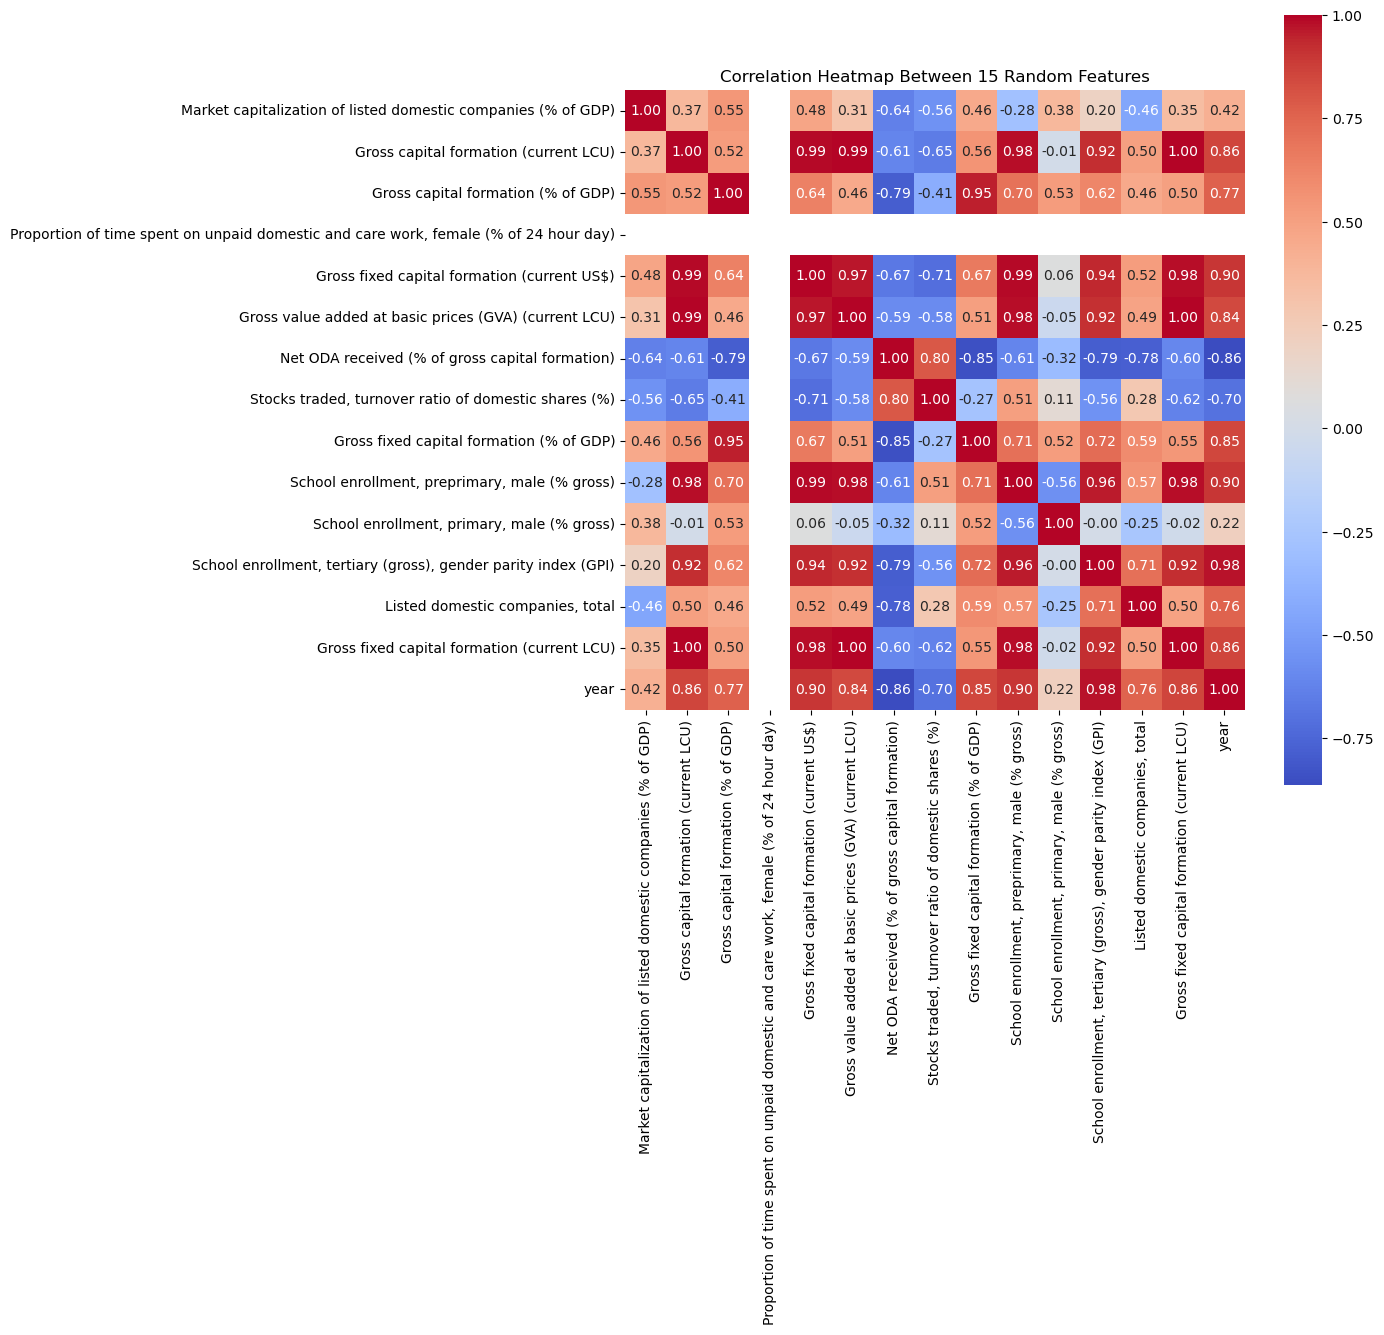

In [28]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a square correlation heatmap with 'Year' on both axes using Seaborn
def create_square_correlation_heatmap_sns(data, num_columns):
    if num_columns <= 1:
        print("Please choose at least 2 columns.")
        return

    # Randomly select columns, excluding 'year'
    columns_to_include = random.sample([col for col in data.columns if col != "year"], num_columns - 1)
    columns_to_include.append("year")

    # Extract the selected columns from the DataFrame
    selected_data = data[columns_to_include]

    # Compute the correlation matrix
    correlation_matrix = selected_data.corr()

    # Create a square heatmap using Seaborn with vertical x-axis text
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

    # Set the title for the plot
    plt.title(f"Correlation Heatmap Between {num_columns} Random Features")

    # Rotate x-axis labels to be vertical
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

# Ask the user for the number of columns to choose
num_columns = 15

# Create a square correlation heatmap with 'Year' on both axes using Seaborn
create_square_correlation_heatmap_sns(india_data, num_columns)


In [85]:
import requests
import pandas as pd
import plotly.express as px

# Load GeoJSON data from the provided URL
url = "https://raw.githubusercontent.com/wri/wri-bounds/master/dist/in_primary_countries.min.geojson"
response = requests.get(url)
geojson_data = response.json()

# Create a GeoDataFrame from the GeoJSON data
gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

# Ask the user for the year
year = input("Enter the year (e.g., 2022): ")

# Filter data for the user-specified year
g20_data_year = g20_data.xs(int(year), level='year')

# Merge the GeoDataFrame with the user-specified data
gdf = gdf.merge(g20_data_year, left_on='name', right_on='country')

# Clean the data by converting non-numeric values to NaN
gdf['Gross capital formation (constant 2015 US$)'] = pd.to_numeric(
    gdf['Gross capital formation (constant 2015 US$)'], errors='coerce'
)

# Create an interactive choropleth map using Plotly for the user-specified year
fig = px.choropleth(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color='Gross capital formation (constant 2015 US$)',
    color_continuous_scale="Viridis",
    hover_data=['name', 'Gross capital formation (constant 2015 US$)'],
    title=f"Gross Capital Formation in {year} (Constant 2015 US$) by Country",
)

# Modify the layout to make the map wider and remove the sidebar color
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="RebeccaPurple",
    showland=True,
    landcolor="LightGray",
    showocean=True,
    oceancolor="LightBlue",
)

# Set the figure width to use 100% of the available width
fig.update_layout(
    autosize=False,  # Turn off autosize to manually set width and height
    width=800,    # Set width to use 100% of the available width
    height=400       # Set your desired height (in pixels)
)

# Show the Plotly figure
fig.show()

In [30]:
# Assuming 'india_data' is your DataFrame and 'Gross domestic income (constant LCU)' is the column you want to plot
india_col = "Gross domestic income (constant LCU)"

fig = px.line(india_data, x='year', y=india_col, title="India's GDP Over the Years")
fig.update_layout(xaxis_title='Year', yaxis_title='GDP (constant LCU)')  # Update the y-axis title
fig.update_xaxes(type='category')  # Set the x-axis to type 'category' for years

fig.show()

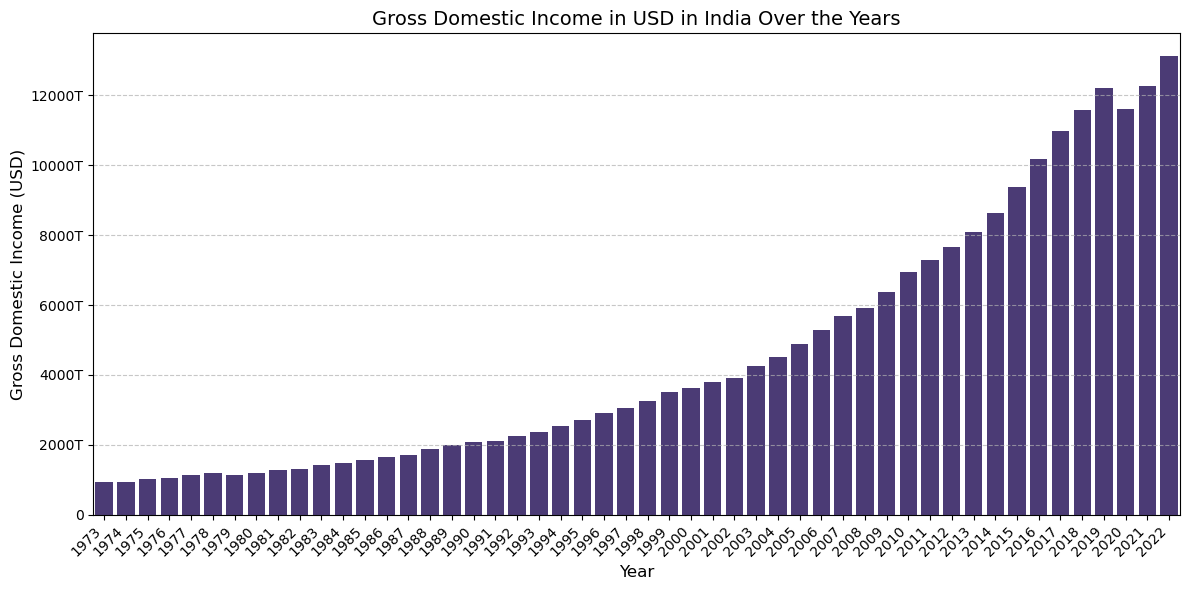

In [31]:
from matplotlib.ticker import FuncFormatter

# Get the exchange rate from the user
exchange_rate_inr_to_usd = 0.012

# Convert Gross domestic income from INR to USD
india_data['GDI_in_usd'] = india_data['Gross domestic income (constant LCU)'] / exchange_rate_inr_to_usd

# Create a figure with appropriate size
plt.figure(figsize=(12, 6))

# Use a Seaborn built-in color palette for the bars
sns.set_palette("viridis")

# Plot the data
ax = sns.barplot(x='year', y='GDI_in_usd', data=india_data, estimator=sum)

# Customize the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set axis labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gross Domestic Income (USD)", fontsize=12)
plt.title("Gross Domestic Income in USD in India Over the Years", fontsize=14)

# Define a custom formatter function to format y-axis labels in millions, billions, or trillions
def millions_billions_trillions(value, _):
    if value >= 1e12:
        return f'{value / 1e12:.0f}T'
    elif value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    else:
        return f'{value:.0f}'

# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(millions_billions_trillions))

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
import plotly.express as px

# Create an interactive bar plot using Plotly Express
fig = px.bar(
    india_data,
    x='year',
    y='Gross domestic income (constant LCU)',
    labels={'Gross domestic income (constant LCU)': 'Gross domestic income (constant LCU)'},
    title='Gross domestic income (constant LCU) in India Over the Years',
    color_discrete_sequence=px.colors.qualitative.D3  # Use a different color scale
)

# Customize the figure size
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=600,  # Set the height of the plot
)

# Customize the x-axis labels
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))

# Define a custom formatter function to format y-axis labels in millions, billions, or trillions
def millions_billions_trillions(value):
    if value >= 1e12:
        return f'{value / 1e12:.0f}T'
    elif value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    else:
        return f'{value:.0f}'

# Apply the custom formatter to the y-axis
fig.update_yaxes(tickformat=".2s", tickvals=[1e6, 1e9, 1e12], ticktext=[millions_billions_trillions(1e6), millions_billions_trillions(1e9), millions_billions_trillions(1e12)])

# Show the interactive plot
fig.show()